<a href="https://www.kaggle.com/code/nandeeshacg/notebookca2b6a14d9?scriptVersionId=252909424" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-some-sample-data/Heart Attack.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Use raw string to avoid escape sequences
data = pd.read_csv('/kaggle/input/heart-attack-some-sample-data/Heart Attack.csv')

data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
# getting some info about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
# number of rows and columns in the dataset

data.shape

(1319, 9)

In [5]:
# number of rows and columns in the dataset

data.shape

(1319, 9)

In [6]:
# statistical measures about the data

data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [7]:
#check if there is any duplicated data

data.duplicated().sum()

0

In [8]:
# Data preproessing
encoder=LabelEncoder()

data['class']=encoder.fit_transform(data['class'])

In [9]:
#data.dtypes

# Correlation
correlation = data.corr()

<Axes: >

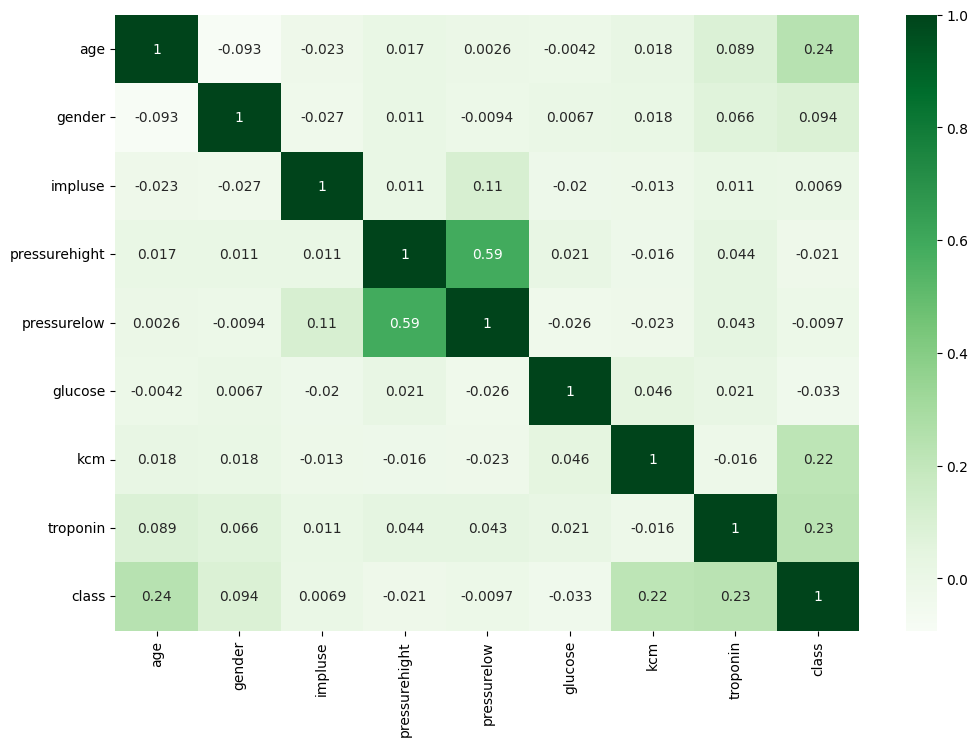

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation ,annot=True ,cbar=True ,cmap='Greens')

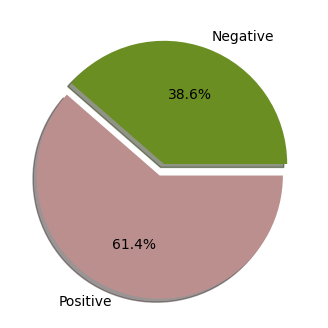

In [11]:
# Dta Visualization
fig = plt.figure(figsize =(15, 4))

plt.pie(data[['class']].groupby('class').size(), labels =['Negative', 'Positive'],\
        explode=(0, 0.1), autopct='%1.1f%%', shadow=True,colors=['olivedrab', 'rosybrown'])

plt.show()

,class,count
0,1,810
1,0,509


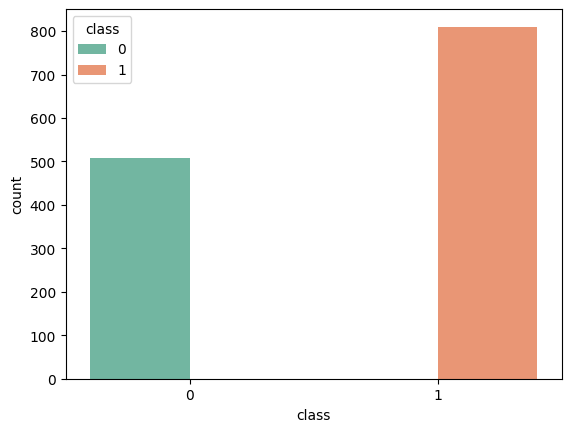

In [12]:
sns.countplot(data=data,x='class',hue='class',palette='Set2')

data['class'].value_counts().reset_index(name='count')

<Axes: >

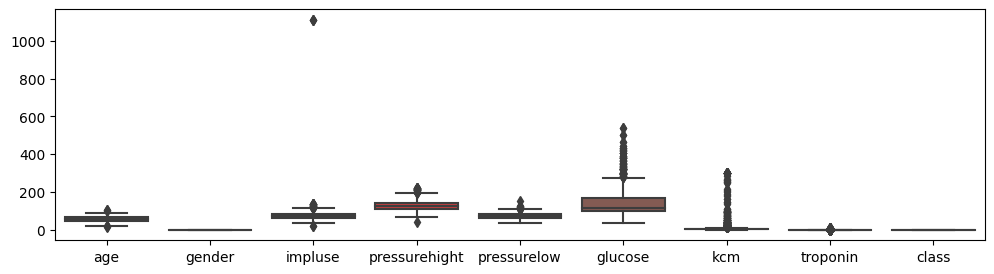

In [13]:
plt.figure(figsize=(12,3))
sns.boxplot(data=data)

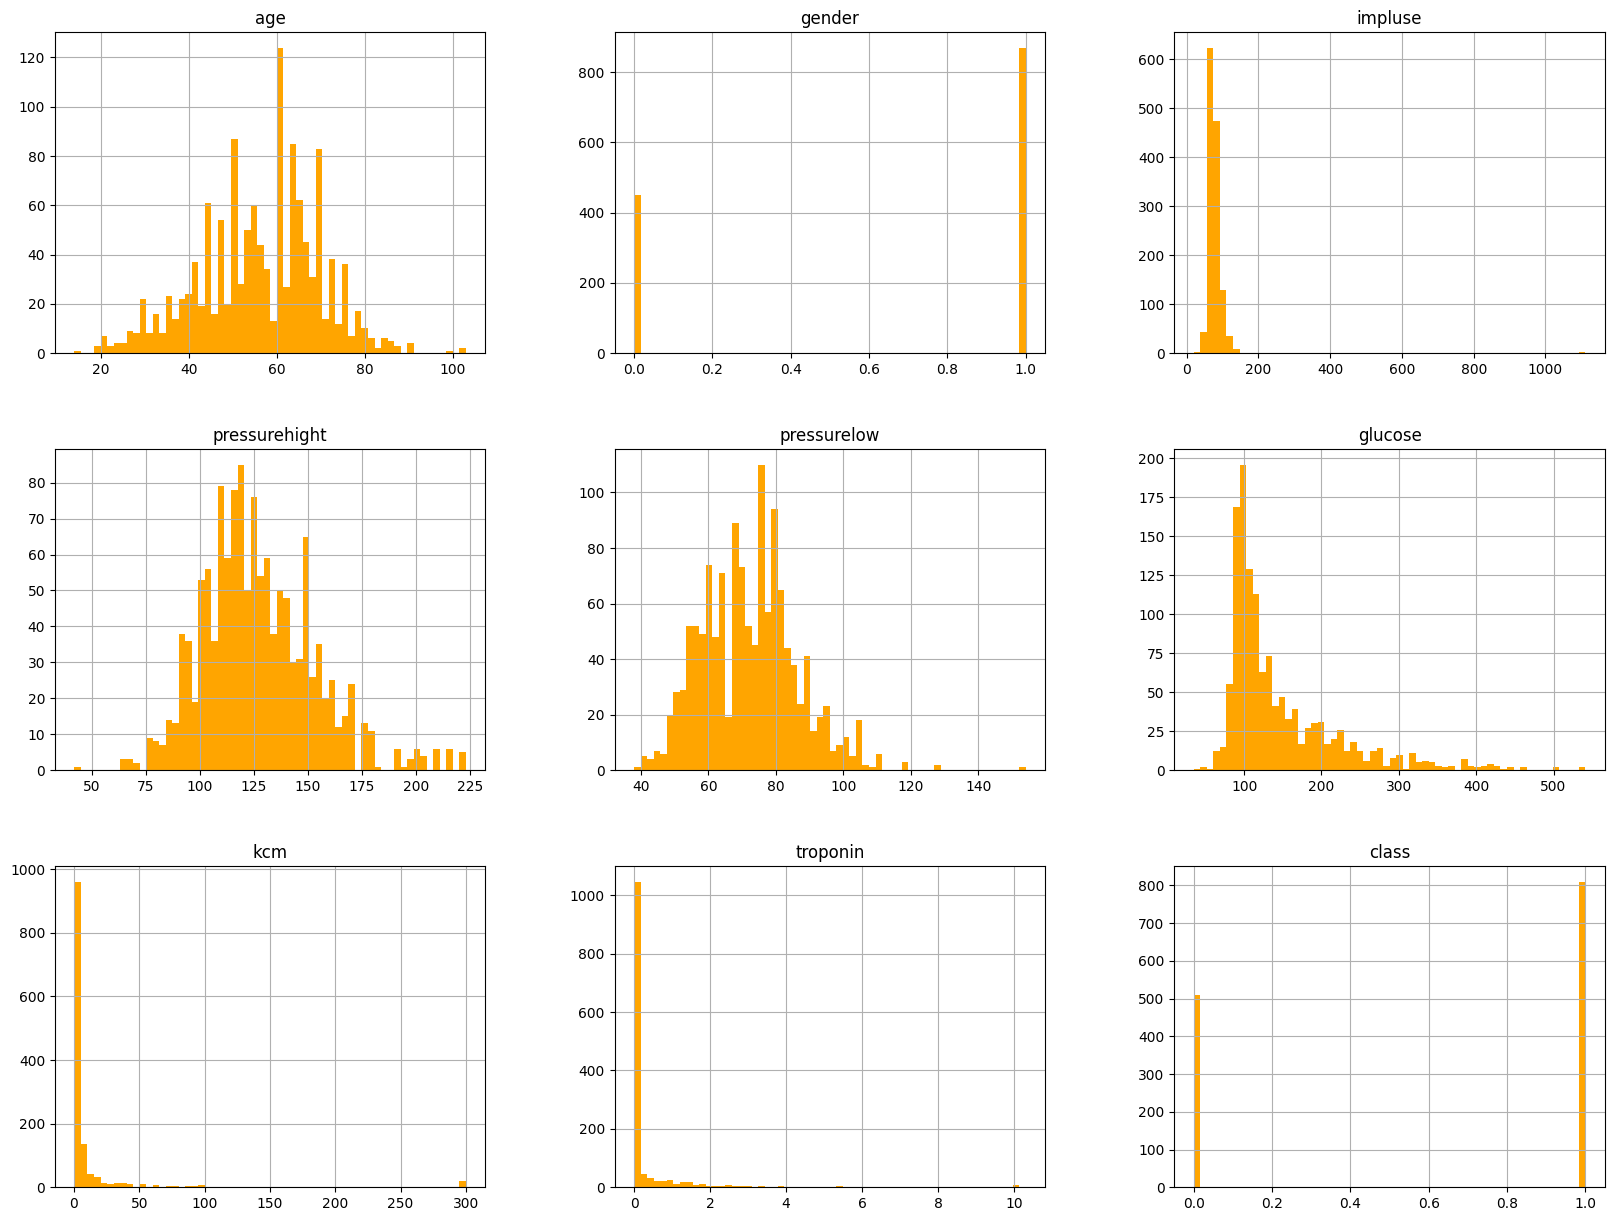

In [14]:
data.hist(bins=60, figsize=(20,15), color='orange')
plt.show()

In [15]:
X = data.drop(["class"] , axis = 1)

y = data["class"].values

X_train , X_test , y_train ,y_test = train_test_split(X,y , test_size= 0.2 , random_state= 42)
X.shape,X_train.shape, X_test.shape,y.shape, y_train.shape, y_test.shape

((1319, 8), (1055, 8), (264, 8), (1319,), (1055,), (264,))

In [16]:
#RandomForestClasssifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 50, 100, 250, 500],
    'max_features': ['sqrt', 'log2'],  
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the classifier
rf = RandomForestClassifier()

# Set up GridSearchCV
rf_random = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", rf_random.best_params_)

Best parameters found:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [17]:
randomforestmodel=RandomForestClassifier(n_estimators= 10, 
                                         min_samples_split = 5, 
                                         min_samples_leaf = 2, 
                                         max_features = 'log2',
                                         max_depth= None,
                                         bootstrap= False,
                                         criterion='entropy')

randomforestmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=10)

In [18]:
y_pred_rf=randomforestmodel.predict(X_test)

In [19]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)

rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

rf_classification_rep = classification_report(y_test, y_pred_rf)

In [20]:
print(f'rf_Accuracy: {rf_accuracy:.2f}')

print('\nrf_Confusion Matrix:')

print(rf_conf_matrix)

print('\nrf_Classification Report:')

print(rf_classification_rep)

rf_Accuracy: 0.98

rf_Confusion Matrix:
[[ 97   4]
 [  2 161]]

rf_Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.97      0.98       264
weighted avg       0.98      0.98      0.98       264



In [21]:
#DesicionTreeModel
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7],
             'min_samples_split':range(2,10),
             'min_samples_leaf':range(2,5)}

In [22]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7],
             'min_samples_split':range(2,10),
             'min_samples_leaf':range(2,5)}

In [23]:
decision_tree_model = DecisionTreeClassifier(criterion='gini',
                                           max_depth= 4,
                                           min_samples_leaf= 2,
                                           min_samples_split= 2)

In [24]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [25]:
y_pred_dt=decision_tree_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_classification_rep = classification_report(y_test, y_pred_dt)

print(f'dt_Accuracy: {dt_accuracy:.2f}')

print('\ndt_Confusion Matrix:')

print(dt_conf_matrix)

print('\ndt_Classification Report:')

print(dt_classification_rep)

dt_Accuracy: 0.98

dt_Confusion Matrix:
[[ 98   3]
 [  3 160]]

dt_Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [26]:
#KNN Model
my_params={'n_neighbors':[3,5,7,9,11,13], 'p':[2,3,7,9,11]}

knn=KNeighborsClassifier()

knngrid=GridSearchCV(knn,my_params,cv=5, n_jobs=-1).fit(X_train,y_train)
knngrid.best_params_

{'n_neighbors': 9, 'p': 2}

In [27]:
model=KNeighborsClassifier(n_neighbors = 9, p=2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

In [28]:
print(f'Accuracy: {accuracy:.2f}')

print('\nConfusion Matrix:')

print(conf_matrix)

print('\nClassification Report:')

print(classification_rep)

Accuracy: 0.62

Confusion Matrix:
[[ 49  52]
 [ 47 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       101
           1       0.69      0.71      0.70       163

    accuracy                           0.62       264
   macro avg       0.60      0.60      0.60       264
weighted avg       0.62      0.62      0.62       264



In [29]:
# System Evaluation
input_data = (64,1,66,160,83,160.0,1.80,0.012)

# change the input data to a numpy array
input_data_as_numpy_array= np.array(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = randomforestmodel.predict(input_data_reshaped)

print(prediction)

if (prediction[0]== 0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
